In [1]:
!pip install python-dotenv

In [3]:
!pip install yfinance==0.1.74

In [4]:
!pip install mplcyberpunk

In [120]:
import pandas as pd
import datetime
import yfinance as yf
from matplotlib import pyplot as plt
import mplcyberpunk
import smtplib
from email.message import EmailMessage

In [121]:
# Chamando os ativos que desejamos no Yahoo Finance, nesse caso serão o Ibov, dolar e euro

ativos = ('^BVSP','BRL=X', 'EURBRL=X')

hoje = datetime.datetime.now()
um_ano_atras = hoje - datetime.timedelta(days = 365) #para fazer de hoje até 1 ano atrás

dados_mercado = yf.download(ativos, um_ano_atras, hoje)

dados_mercado




[*********************100%***********************]  3 of 3 completed


Adj Close                      Close                       High  \
               BRL=X EURBRL=X     ^BVSP   BRL=X EURBRL=X     ^BVSP   BRL=X   
Date                                                                         
2022-04-06    4.6507   5.0703  118228.0  4.6507   5.0703  118228.0  4.7126   
2022-04-07    4.7152   5.1357  118862.0  4.7152   5.1357  118862.0  4.7699   
2022-04-08    4.7521   5.1606  118322.0  4.7521   5.1606  118322.0  4.7913   
2022-04-11    4.6981   5.1049  116953.0  4.6981   5.1049  116953.0  4.7326   
2022-04-12    4.6936   5.1035  116147.0  4.6936   5.1035  116147.0  4.6971   
...              ...      ...       ...     ...      ...       ...     ...   
2023-03-31    5.0927   5.5518  101882.0  5.0927   5.5518  101882.0  5.1033   
2023-04-03    5.0623   5.4856  101506.0  5.0623   5.4856  101506.0  5.0755   
2023-04-04    5.0631   5.5201  101869.0  5.0631   5.5201  101869.0  5.0976   
2023-04-05    5.0707   5.5538  100978.0  5.0707   5.5538  100978.0  5.0743   
2023-04-06    5.0551   5.5111       NaN  5.0551   5.5111       NaN  5.0552   

                                    Low                       Open           \
           EURBRL=X     ^BVSP     BRL=X EURBRL=X     ^BVSP   BRL=X EURBRL=X   
Date                                                                          
2022-04-06   5.1429  118885.0  4.647900   5.0517  116791.0  4.6507   5.0684   
2022-04-07   5.1980  119247.0  4.690400   5.1134  117509.0  4.7152   5.1380   
2022-04-08   5.1913  118868.0  4.707518   5.1134  117487.0  4.7521   5.1572   
2022-04-11   5.1566  118320.0  4.684016   5.1004  116953.0  4.6980   5.1049   
2022-04-12   5.1086  118615.0  4.621500   5.0326  116054.0  4.6936   5.1051   
...             ...       ...       ...      ...       ...     ...      ...   
2023-03-31   5.5615  104041.0  5.055200   5.4891  101476.0  5.0927   5.5523   
2023-04-03   5.5231  101916.0  5.036216   5.4603  100651.0  5.0623   5.4616   
2023-04-04   5.5813  103056.0  5.048277   5.5023  101505.0  5.0631   5.5189   
2023-04-05   5.5599  101960.0  5.027504   5.4953   99898.0  5.0707   5.5543   
2023-04-06   5.5119       NaN  5.034000   5.4814       NaN  5.0340   5.4900   

                     Volume                       
               ^BVSP  BRL=X EURBRL=X       ^BVSP  
Date                                              
2022-04-06  118885.0      0        0  13410800.0  
2022-04-07  118226.0      0        0  11520100.0  
2022-04-08  118861.0      0        0  11225800.0  
2022-04-11  118320.0      0        0   9558400.0  
2022-04-12  116963.0      0        0  11406800.0  
...              ...    ...      ...         ...  
2023-03-31  103714.0      0        0  15111200.0  
2023-04-03  101883.0      0        0  12794800.0  
2023-04-04  101505.0      0        0  11695800.0  
2023-04-05  101869.0      0        0  13256500.0  
2023-04-06       NaN      0        0         NaN  

[262 rows x 18 columns]

In [122]:
dados_fechamento = dados_mercado['Adj Close'] 
dados_fechamento.columns = ['dolar','euro', 'ibovespa'] #alterando os nomes das colunas
dados_fechamento = dados_fechamento.dropna()


display(dados_fechamento)

,dolar,euro,ibovespa
Date,,,
2022-04-06,4.6507,5.0703,118228.0
2022-04-07,4.7152,5.1357,118862.0
2022-04-08,4.7521,5.1606,118322.0
2022-04-11,4.6981,5.1049,116953.0
2022-04-12,4.6936,5.1035,116147.0
...,...,...,...
2023-03-30,5.1342,5.5650,103713.0
2023-03-31,5.0927,5.5518,101882.0
2023-04-03,5.0623,5.4856,101506.0


# Agora será necessário criar com outros timeframes

In [123]:
# utilizando o "resample"

dados_fechamento_mensal = dados_fechamento.resample('M').last() #colocamos a letra M para simbolizar mês, e last para pegar o último valor
dados_fechamento_anual = dados_fechamento.resample('A').last()


dados_fechamento_anual

,dolar,euro,ibovespa
Date,,,
2022-12-31,5.2668,5.5878,110031.0
2023-12-31,5.0707,5.5538,100978.0


# Calcularemos o fechamento, retorno anual e retorno mensal


In [124]:
## pct_change serve para calcular a porcentagem de retorno 
retorno_ano = dados_fechamento_anual.pct_change().dropna()
retorno_mes = dados_fechamento_mensal.pct_change().dropna()
retorno_dia = dados_fechamento.pct_change().dropna()

retorno_dia

,dolar,euro,ibovespa
Date,,,
2022-04-07,0.013869,0.012899,0.005363
2022-04-08,0.007826,0.004848,-0.004543
2022-04-11,-0.011363,-0.010793,-0.011570
2022-04-12,-0.000958,-0.000274,-0.006892
2022-04-13,-0.004368,-0.009229,0.005467
...,...,...,...
2023-03-30,-0.005848,-0.005593,0.018862
2023-03-31,-0.008083,-0.002372,-0.017654
2023-04-03,-0.005969,-0.011924,-0.003691


In [125]:
# Localizar fechamento do dia anterior, retorno no mês e retorno no ano 
# usando 'iloc' que seleciona elementos como uma matriz

retorno_dia_dolar = retorno_dia.iloc[-1, 0]
retorno_dia_euro = retorno_dia.iloc[-1, 1]
retorno_dia_ibov = retorno_dia.iloc[-1, 2]

retorno_mes_dolar = retorno_mes.iloc[-1, 0]
retorno_mes_euro = retorno_mes.iloc[-1, 1]
retorno_mes_ibov = retorno_mes.iloc[-1, 2]

retorno_ano_dolar = retorno_ano.iloc[-1, 0]
retorno_ano_euro = retorno_ano.iloc[-1, 1]
retorno_ano_ibov = retorno_ano.iloc[-1, 2]




retorno_dia_euro

0.00610495980257908

In [126]:
# arredondados o número do fechamento do dia anterior, retorno no mês e retorno no ano para torna-los melhor compreensíveis 

retorno_dia_dolar = round(retorno_dia_dolar * 100, 2)
retorno_dia_euro = round(retorno_dia_euro * 100, 2)
retorno_dia_ibov = round(retorno_dia_ibov * 100, 2)

retorno_mes_dolar = round(retorno_mes_dolar * 100, 2)
retorno_mes_euro = round(retorno_mes_euro * 100, 2)
retorno_mes_ibov = round(retorno_mes_ibov * 100, 2)

retorno_ano_dolar = round(retorno_ano_dolar * 100, 2)
retorno_ano_euro = round(retorno_ano_euro * 100, 2)
retorno_ano_ibov = round(retorno_ano_ibov * 100, 2)

# Gráficos

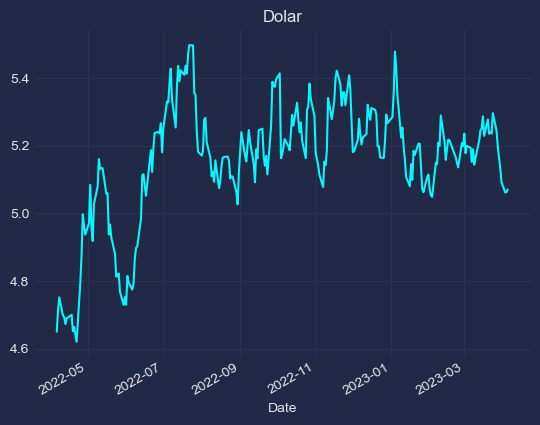

In [106]:
plt.style.use("cyberpunk")

dados_fechamento.plot(y = 'dolar', use_index = True, legend = False)
plt.title('Dolar')
plt.savefig('dolar.png', dpi = 300)

plt.show()

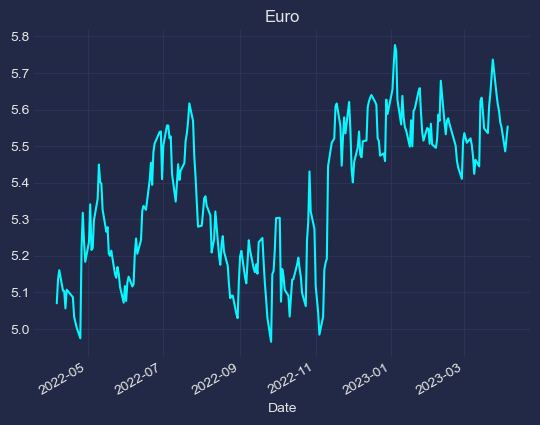

In [107]:
plt.style.use("cyberpunk")

dados_fechamento.plot(y = 'euro', use_index = True, legend = False)
plt.title('Euro')
plt.savefig('euro.png', dpi = 300)

plt.show()

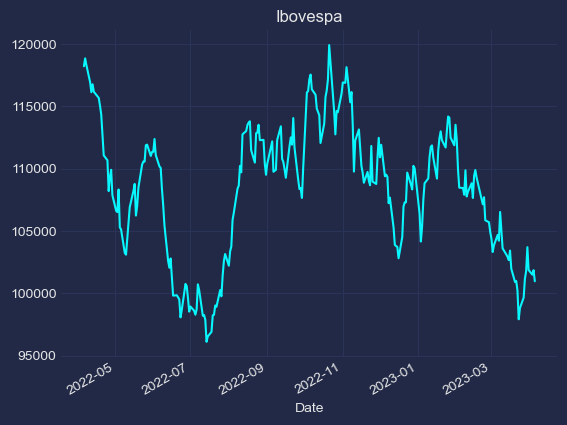

In [108]:
plt.style.use("cyberpunk")

dados_fechamento.plot(y = 'ibovespa', use_index = True, legend = False)
plt.title('Ibovespa')
plt.savefig('ibovespa.png', dpi = 300)

plt.show()

# Bora Mandar o e-mail

In [109]:
import os
from dotenv import load_dotenv



In [110]:
load_dotenv() #no arquivo tem que estar "senha=..." e salvar como .env


True

In [111]:
senha = os.environ.get("senha")
email = 'csampaion@gmail.com'

In [118]:
retorno_dia_euro

0.61

In [113]:
msg = EmailMessage()
msg['Subject'] = "Enviando e-mail com o Python"
msg['From'] = 'csampaion@gmail.com'
msg['To'] = 'brenno@varos.com.br'

msg.set_content(f'''Prezado, segue o relatório diário:


Bolsa:

No ano o Ibovespa está tendo uma rentabilidade de {retorno_ano_ibov}%, 
enquanto no mês a rentabilidade é de {retorno_mes_ibov}%.

No último dia útil, o fechamento do Ibovespa foi de {retorno_dia_ibov}%.

Dólar:

No ano o Dólar está tendo uma rentabilidade de {retorno_ano_dolar}%, 
enquanto no mês a rentabilidade é de {retorno_mes_dolar}%.

No último dia útil, o fechamento do Dólar foi de {retorno_dia_dolar}%.


Euro:

No ano o Dólar está tendo uma rentabilidade de {retorno_ano_euro}%, 
enquanto no mês a rentabilidade é de {retorno_mes_euro}%.

No último dia útil, o fechamento do Euro foi de {retorno_dia_euro}%.


Abs,

O melhor estagiário do mundo

''')

In [114]:
with open('dolar.png', 'rb') as content_file:
    content = content_file.read()
    msg.add_attachment(content, maintype='application', subtype='png', filename='dolar.png')
    
    
with open('ibovespa.png', 'rb') as content_file:
    content = content_file.read()
    msg.add_attachment(content, maintype='application', subtype='png', filename='ibovespa.png')
    
with open('euro.png', 'rb') as content_file:
    content = content_file.read()
    msg.add_attachment(content, maintype='application', subtype='png', filename='euro.png')

In [115]:
with smtplib.SMTP_SSL('smtp.gmail.com', 465) as smtp:
    
    smtp.login(email, senha)
    smtp.send_message(msg)